## <h1 align='center'> Wine quality predict Using ANN

- > The problem statement is that we need to predict the quality of the wine with respect to different parameters such as alcohol, acidity, ph etc.. Using artificial neural network.

In [56]:
## importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')


In [57]:
df=pd.read_csv("/content/drive/MyDrive/Projects/Wine quality test project (DL)/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
df.shape

(1599, 12)

Let's have a look at the input variable:
1. fixed acidity - non- volatile acids that do notevaporate readily.
2. volatile_Acidity - are high acetic in wine which leads to an unpleasant vinegar taste.
3. citric acid - acts as a preservative, adds freshness and flavor to wine.
4. residual sugar - amout of sugar remaining after fermentaion stops.
5. chlorides - the amount of salt in wine.
6. total sulfur  dioxide- amount of free + bound forms of 502.
7. free sulfur dioxide prevents microbial growth.
8. Density - density of wine (affects sweetness)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [60]:
## Statistical ananlysis to check distribution of numerical columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [61]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [62]:
def hisplt(dataframe,col):
  sb.histplot(x=col,data=dataframe,kde=True)
  plt.xlabel(col)


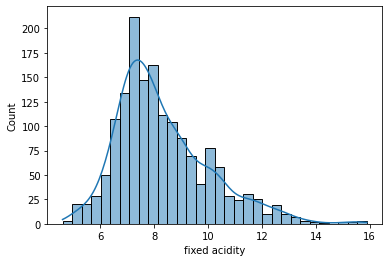

In [63]:
hisplt(df,'fixed acidity')

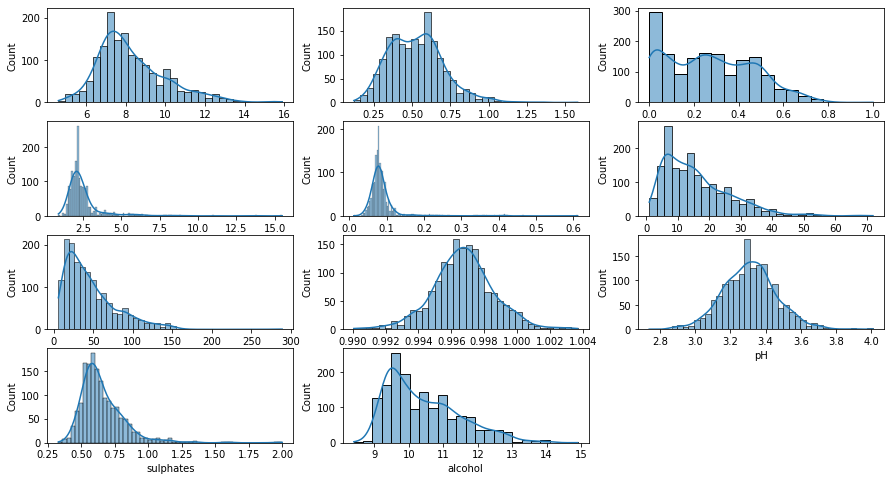

In [64]:
lst=['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']
i=1
plt.figure(figsize=(15,8))
for j in lst:  ## instead of separate lst we can use dataframe.columns
  plt.subplot(4,3,i)
  sb.histplot(x=j,data=df,kde=True)
  plt.xlabel(j)
  i=i+1
  

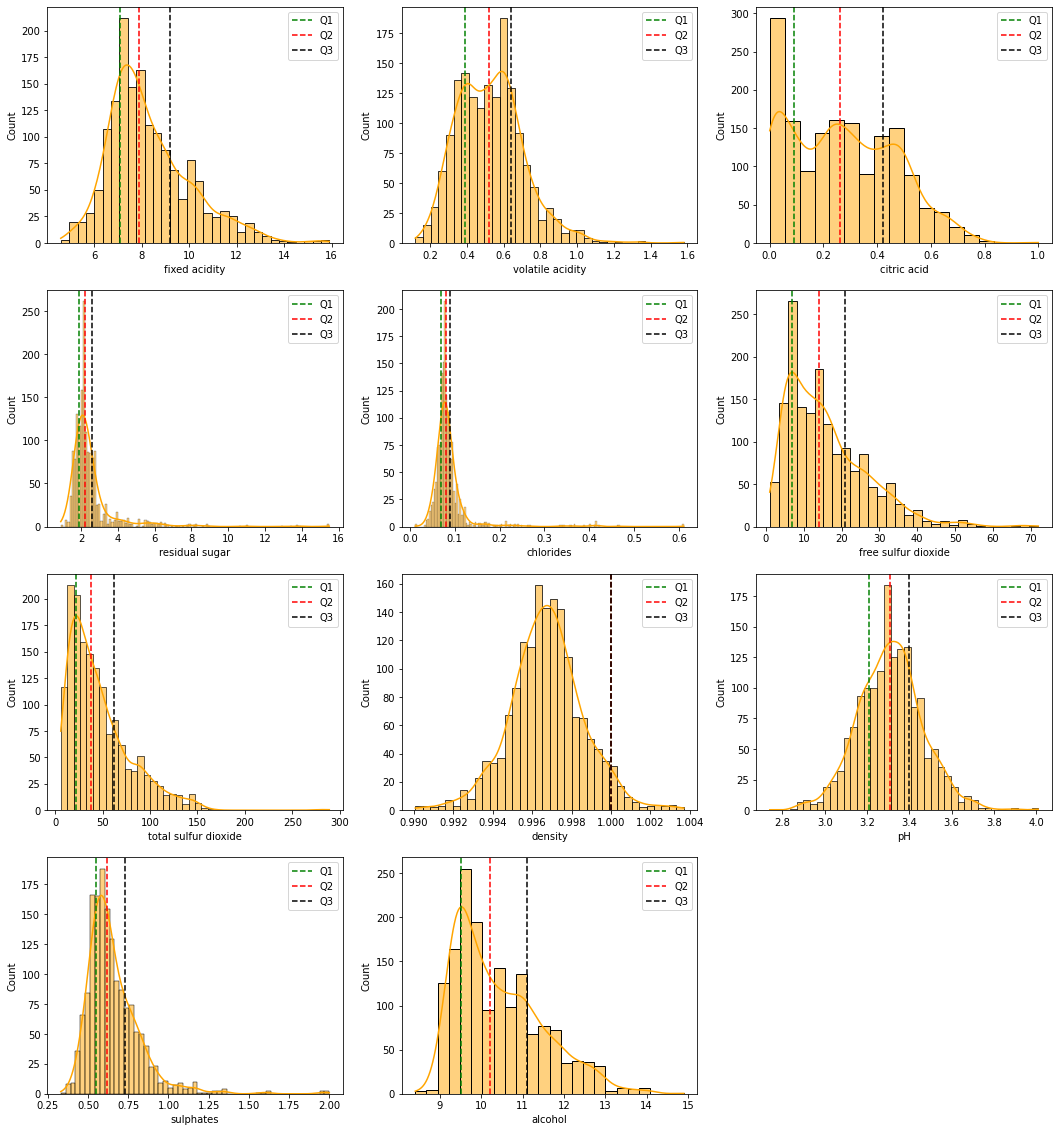

In [65]:
## for outlier and to see distribution

feature_= df.columns[:-1]
def get_percentile(feature,q_range):
  dist=df[feature].describe()[str(q_range) + '%']
  return round(dist,2)

def render_counterplot():
  fig=plt.figure(figsize=(18,20))
  for column,feature in enumerate(feature_):
    fig.add_subplot(4,3,column + 1)
    q1= get_percentile(feature,25)
    q2= get_percentile(feature,50)
    q3= get_percentile(feature,75)

    sb.histplot(data=df,x=feature,kde=True,color='orange')
    
    plt.axvline(q1,linestyle='--',color='green',label='Q1')
    plt.axvline(q2,linestyle='--',color='red',label='Q2')
    plt.axvline(q3,linestyle='--',color='black',label='Q3')
    plt.legend()
render_counterplot()

Text(0, 0.5, 'count')

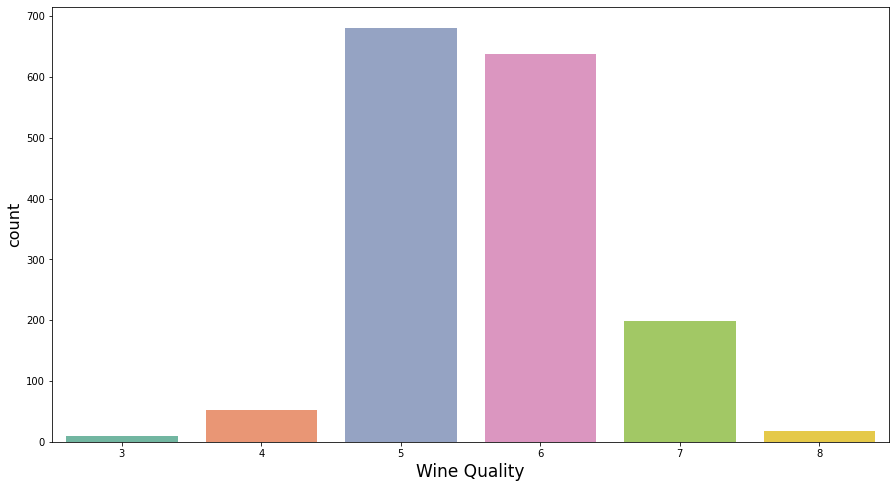

In [66]:
## visualization of quality column
plt.figure(figsize=(15,8))
sb.countplot(df['quality'],palette='Set2')
plt.xlabel("Wine Quality",fontsize=17)
plt.ylabel("count",fontsize=16)

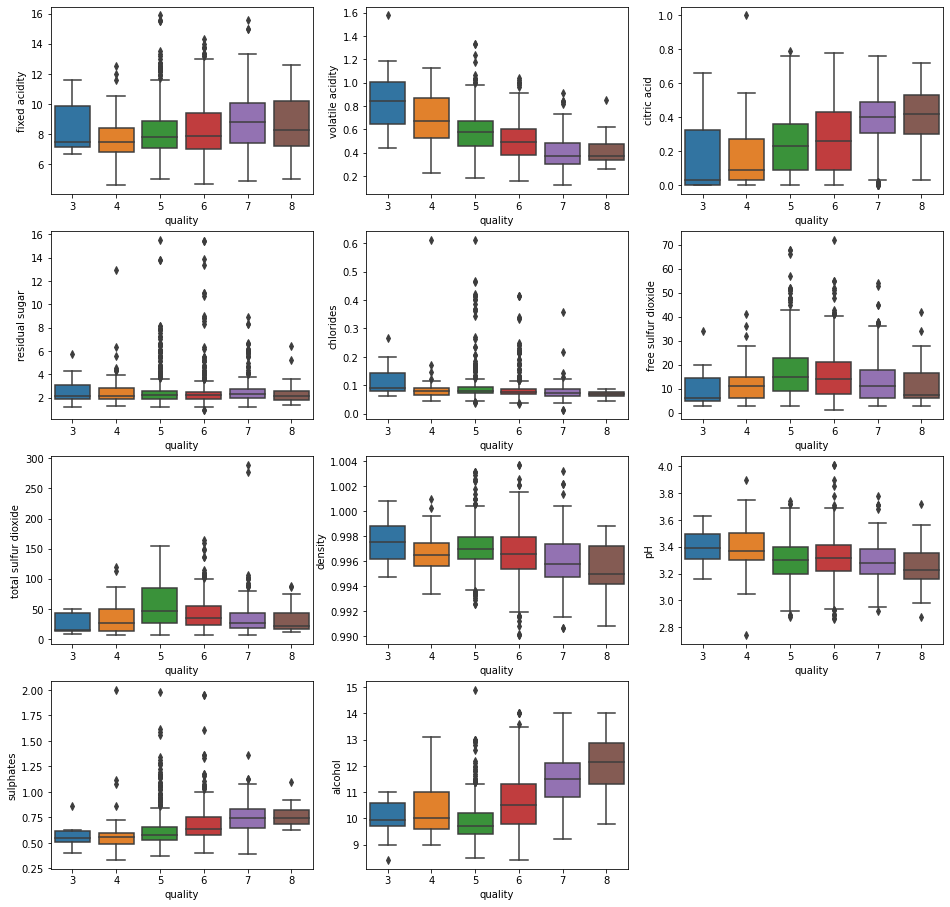

In [67]:
## boxplot
feature_= df.columns[:-1]
fig=plt.figure(figsize=(16,20))
for column,feature in enumerate(feature_):
  fig.add_subplot(5,3, column+1)
  sb.boxplot(data=df,x='quality',y=feature)


# Feature engineering

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1,max_depth=12)

In [69]:
#splitting independendent and fitting 
x=df.drop('quality',axis=1)
rf.fit(x,df.quality)

RandomForestClassifier(max_depth=12, random_state=1)

Text(0.5, 0, 'feature importance')

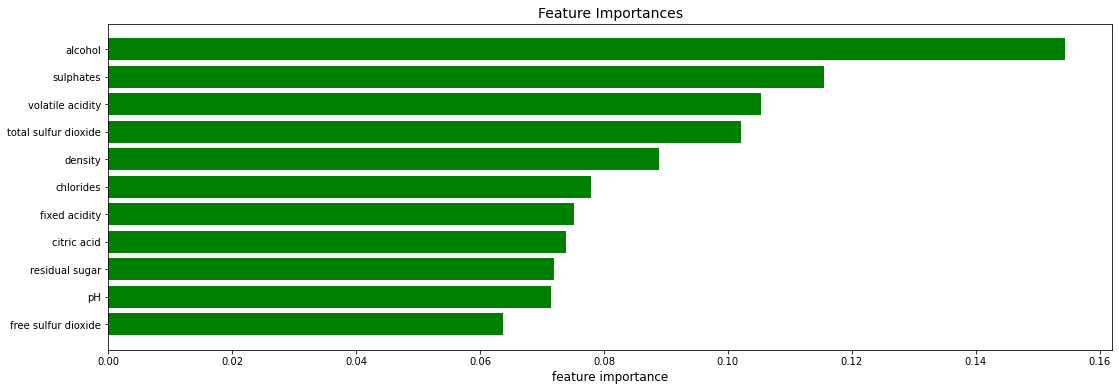

In [70]:
# store importance and feature names


features = df.columns
importances = rf.feature_importances_
sorted_index = np.argsort(importances)[:]
plt.figure(figsize = (18,6))
plt.title('Feature Importances',fontsize = 14)
plt.barh(range(len(sorted_index)),importances[sorted_index],color = 'green', align= 'center')
plt.yticks(range(len(sorted_index)),[features[i] for i in sorted_index])
plt.xlabel('feature importance', fontsize=12)

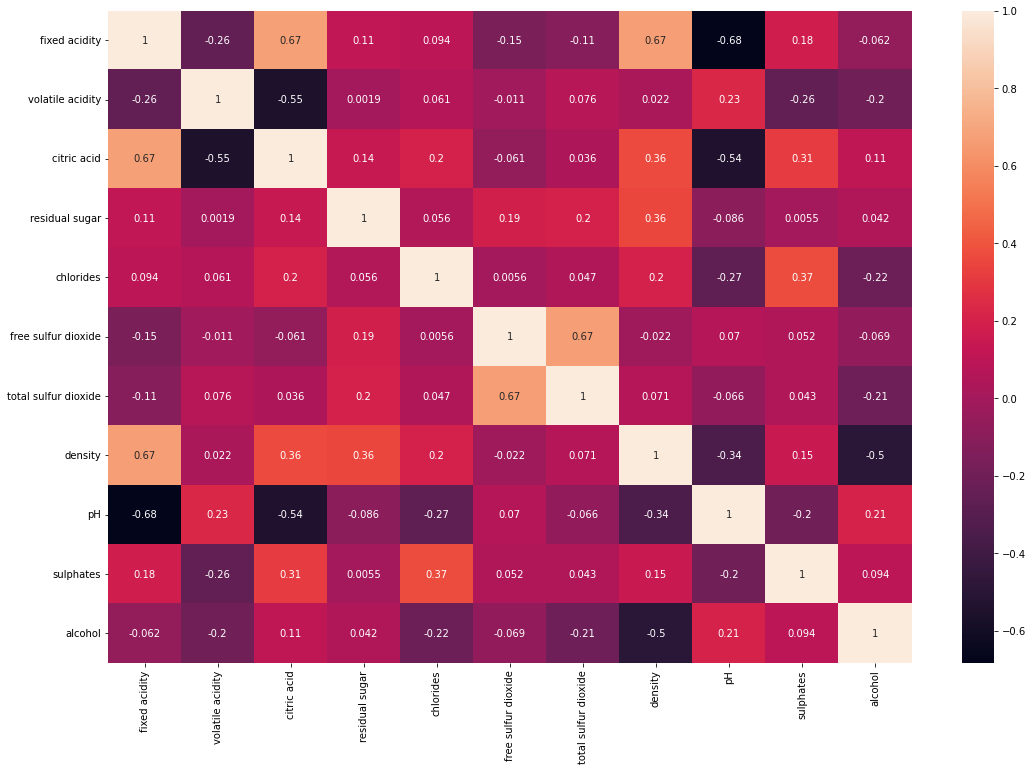

In [71]:
# check for multicollinearity
plt.figure(figsize=(18,12))
sb.heatmap(x.corr(),annot = True)
plt.show()

In [72]:
dfc=x.corr()
dfc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [73]:
## checking multi collenearity


for i in range(dfc.shape[0]):
  for j in range(dfc.shape[1]):
    if (abs(dfc.iloc[i,j]) > 0.6) and (abs(dfc.iloc[i,j]) != 1):
      print(dfc.iloc[i,j],dfc.columns[i],dfc.index[j])                


      ## here 0.6 is highest

0.6717034347641064 fixed acidity citric acid
0.6680472921189573 fixed acidity density
-0.6829781945685302 fixed acidity pH
0.6717034347641064 citric acid fixed acidity
0.667666450481023 free sulfur dioxide total sulfur dioxide
0.667666450481023 total sulfur dioxide free sulfur dioxide
0.6680472921189573 density fixed acidity
-0.6829781945685302 pH fixed acidity


# Handling imbalanced data set

In [74]:
from imblearn.over_sampling import SMOTE
x=df.drop('quality',axis=1)
y=df.quality
smote= SMOTE(sampling_strategy='auto')      ## we can use another parameter here instead of 'auto' use 'not minority','minority','not majority','all'
x_sm,y_sm=smote.fit_resample(x,y)

In [75]:
y.value_counts()      ## Original sample

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [76]:
y_sm.value_counts()       ## resamplled

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

# Standardization

In [77]:
from sklearn.preprocessing import StandardScaler


In [78]:
scaler=StandardScaler()
x_sm[x_sm.columns]=scaler.fit_transform(x_sm[x_sm.columns])

In [79]:
x_sm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.573833,0.440957,-1.335138,-0.573892,-0.302595,-0.247971,-0.085537,0.680684,1.168341,-0.628145,-1.126079
1,-0.331054,1.157051,-1.335138,0.002637,0.186109,1.204271,1.086151,0.149946,-0.844906,0.143614,-0.786320
2,-0.331054,0.679655,-1.137469,-0.244447,0.052826,0.166955,0.624577,0.256094,-0.455246,-0.049326,-0.786320
3,1.732567,-1.229928,1.432237,-0.573892,-0.324809,0.374418,0.837611,0.786832,-1.104680,-0.499518,-0.786320
4,-0.573833,0.440957,-1.335138,-0.573892,-0.302595,-0.247971,-0.085537,0.680684,1.168341,-0.628145,-1.126079
...,...,...,...,...,...,...,...,...,...,...,...
4081,-0.013358,-0.392101,0.624054,-0.283159,-0.341787,-0.595769,-0.701662,-1.786718,-0.821990,0.332786,1.836866
4082,0.860509,-0.834983,1.197184,-0.383140,-0.422872,-0.748892,-0.724639,-0.439479,-0.941479,0.101294,0.978939
4083,-0.123630,-0.940038,0.443447,-0.609260,-0.353360,0.211654,-0.415270,-0.893841,-0.918630,0.382327,0.378860
4084,0.402817,-1.129157,1.230293,0.006392,-0.288729,-0.821921,-0.714367,-0.100068,-1.077314,1.892812,0.570982


In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=40)

In [81]:
## we need to change the class names starting from 0
# we can create dict and map    or
## we can use label encoding on the target column

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [82]:
y_train

array([2, 0, 1, ..., 0, 0, 4])

In [83]:
## it's array so reshaping it
y_train = pd.DataFrame(y_train.reshape(len(y_train),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))

In [84]:
y_train

,0
0,2
1,0
2,1
3,3
4,3
...,...
3263,4
3264,0
3265,0
3266,0


In [85]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.layers import Dropout     ## to avoid overfitting in DL we use Dropout

In [86]:
y_train=tensorflow.keras.utils.to_categorical(y_train,6) ## some convenience  like if 0 - [1,0,0,0,0,0]
y_test=tensorflow.keras.utils.to_categorical(y_test,6)                            # if 1 - [0,1,0,0,0,0]

In [87]:
y_train

array([[0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [88]:
y_test

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

## ANN Model building

In [89]:

model = Sequential()
model.add(tensorflow.keras.layers.Input(shape = 11,))
model.add(tensorflow.keras.layers.Dense(32,activation = 'relu'))
model.add(tensorflow.keras.layers.Dense(64,activation = 'relu'))          ## 32 and 64 - > number of neurons
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(128,activation = 'relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(6,activation = 'softmax'))

# model compilation

In [90]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [91]:
model.fit(x_train,y_train,epochs=800,verbose=1)

Epoch 1/800
103/103 [==============================] - 1s 3ms/step - loss: 1.4821 - accuracy: 0.3923
Epoch 2/800
103/103 [==============================] - 0s 3ms/step - loss: 1.1440 - accuracy: 0.5107
Epoch 3/800
103/103 [==============================] - 0s 3ms/step - loss: 1.0455 - accuracy: 0.5539
Epoch 4/800
103/103 [==============================] - 0s 3ms/step - loss: 0.9773 - accuracy: 0.5863
Epoch 5/800
103/103 [==============================] - 0s 3ms/step - loss: 0.9191 - accuracy: 0.6206
Epoch 6/800
103/103 [==============================] - 0s 2ms/step - loss: 0.8591 - accuracy: 0.6493
Epoch 7/800
103/103 [==============================] - 0s 2ms/step - loss: 0.8407 - accuracy: 0.6597
Epoch 8/800
103/103 [==============================] - 0s 3ms/step - loss: 0.8127 - accuracy: 0.6695
Epoch 9/800
103/103 [==============================] - 0s 3ms/step - loss: 0.7865 - accuracy: 0.6870
Epoch 10/800
103/103 [==============================] - 0s 2ms/step - loss: 0.7607 - accura

In [92]:
y_pred=model.predict(x_test)

In [93]:
y_pred

array([[0.00000000e+00, 9.99592364e-01, 2.90169381e-04, 1.17469914e-04,
        1.00744175e-19, 0.00000000e+00],
       [5.85537374e-18, 9.96873736e-01, 3.12539842e-03, 8.34896866e-07,
        4.41855988e-30, 3.06557087e-27],
       [0.00000000e+00, 0.00000000e+00, 2.92779375e-02, 9.70722020e-01,
        6.16355189e-10, 3.76801886e-33],
       ...,
       [9.99901175e-01, 2.56836408e-28, 9.77329109e-05, 1.06404400e-06,
        4.28877477e-16, 1.32963584e-37],
       [0.00000000e+00, 2.76723224e-14, 9.95472729e-01, 4.52722143e-03,
        0.00000000e+00, 0.00000000e+00],
       [9.18356052e-35, 1.02476475e-29, 3.94588460e-05, 5.99344773e-03,
        9.93967056e-01, 2.24359993e-22]], dtype=float32)

In [94]:
## converting back to normal
y_test = np.argmax(y_test,axis=1)

In [95]:
y_test

array([1, 1, 3, 5, 1, 3, 5, 2, 3, 2, 2, 5, 4, 2, 0, 5, 1, 0, 1, 5, 0, 1,
       3, 1, 4, 4, 0, 4, 0, 1, 1, 0, 3, 5, 4, 1, 1, 5, 2, 5, 0, 4, 2, 4,
       3, 5, 5, 0, 3, 5, 2, 5, 4, 2, 5, 1, 4, 3, 1, 2, 5, 4, 2, 3, 5, 2,
       5, 0, 1, 0, 0, 2, 1, 5, 4, 0, 5, 0, 2, 1, 4, 5, 1, 0, 4, 0, 2, 3,
       1, 3, 2, 4, 3, 5, 5, 2, 2, 0, 1, 0, 2, 4, 0, 0, 2, 0, 2, 1, 1, 4,
       1, 2, 4, 4, 2, 4, 1, 3, 5, 5, 5, 3, 2, 1, 4, 1, 3, 1, 3, 4, 2, 0,
       3, 1, 3, 4, 3, 0, 0, 5, 3, 0, 2, 0, 4, 5, 4, 3, 5, 4, 0, 5, 4, 3,
       0, 2, 4, 3, 2, 0, 4, 2, 3, 4, 4, 0, 1, 0, 2, 3, 1, 2, 2, 0, 1, 3,
       0, 3, 2, 1, 5, 3, 2, 1, 4, 4, 0, 0, 0, 5, 3, 5, 5, 4, 0, 0, 3, 4,
       0, 0, 1, 4, 4, 4, 3, 1, 2, 5, 5, 5, 1, 5, 0, 0, 5, 4, 5, 5, 4, 3,
       1, 1, 4, 2, 1, 3, 2, 5, 4, 0, 0, 3, 4, 3, 1, 1, 0, 3, 3, 3, 4, 5,
       1, 3, 4, 4, 0, 1, 3, 5, 3, 3, 3, 2, 2, 0, 0, 5, 2, 4, 3, 2, 1, 3,
       4, 3, 5, 2, 3, 5, 1, 2, 1, 5, 2, 3, 3, 1, 1, 0, 0, 4, 0, 3, 2, 0,
       4, 2, 5, 1, 1, 4, 0, 1, 0, 1, 4, 3, 1, 0, 4,

In [96]:
y_pred=np.argmax(y_pred,axis=1)

In [97]:
y_pred

array([1, 1, 3, 5, 2, 3, 5, 4, 3, 2, 2, 5, 4, 3, 0, 5, 1, 0, 2, 5, 0, 1,
       3, 1, 4, 4, 0, 4, 0, 1, 1, 0, 3, 5, 4, 1, 1, 5, 2, 5, 0, 4, 2, 4,
       3, 5, 5, 0, 3, 5, 3, 5, 4, 3, 5, 1, 4, 3, 1, 2, 5, 4, 2, 4, 5, 2,
       5, 0, 1, 0, 0, 3, 1, 5, 4, 0, 5, 0, 2, 1, 4, 5, 1, 0, 4, 0, 2, 3,
       1, 4, 2, 4, 3, 5, 5, 3, 2, 0, 1, 0, 3, 3, 0, 0, 3, 0, 2, 1, 1, 4,
       1, 2, 4, 4, 2, 3, 1, 4, 5, 5, 5, 2, 2, 1, 4, 1, 3, 1, 3, 4, 3, 0,
       3, 1, 3, 4, 3, 0, 0, 5, 3, 0, 2, 0, 4, 5, 4, 3, 5, 4, 0, 5, 4, 2,
       0, 2, 3, 4, 2, 0, 4, 2, 1, 4, 4, 0, 1, 0, 2, 3, 1, 2, 3, 0, 1, 2,
       0, 4, 3, 1, 5, 3, 2, 1, 4, 4, 0, 0, 0, 5, 3, 5, 5, 3, 0, 0, 3, 4,
       0, 0, 1, 4, 4, 4, 3, 1, 2, 5, 5, 5, 1, 5, 0, 0, 5, 4, 5, 5, 4, 2,
       1, 1, 4, 2, 1, 3, 2, 5, 4, 0, 0, 3, 4, 3, 1, 1, 0, 1, 3, 3, 4, 5,
       1, 3, 4, 4, 0, 1, 3, 5, 3, 2, 2, 1, 2, 0, 0, 5, 2, 4, 3, 2, 1, 3,
       4, 4, 5, 3, 3, 5, 1, 2, 1, 5, 3, 2, 2, 1, 1, 0, 0, 4, 0, 3, 2, 0,
       4, 2, 5, 1, 1, 4, 0, 1, 0, 1, 4, 3, 1, 0, 4,

# Model evaluation

In [98]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

88.75305623471883

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       0.95      0.98      0.96       146
           2       0.77      0.72      0.75       127
           3       0.68      0.67      0.67       127
           4       0.87      0.91      0.89       129
           5       1.00      0.99      1.00       143

    accuracy                           0.89       818
   macro avg       0.88      0.88      0.88       818
weighted avg       0.89      0.89      0.89       818

